# ``Estandarización``

In [54]:
# Lectura de datos
# ==============================================================================
import pickle

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable
from sklearn.preprocessing import OneHotEncoder

# Estadísticos
# ==============================================================================
from scipy import stats
import researchpy as rp
from scipy.stats import levene
from sklearn.preprocessing import RobustScaler


# Librerías para manejar fechas
# ==============================================================================
from datetime import datetime
import calendar

# Desplegar todas las columnas
# ==============================================================================
pd.options.display.max_columns = None

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Test de Shapiro
# ==============================================================================
from scipy import stats

# Asimetría
# ==============================================================================
from scipy.stats import skew

# Curtosis
# ==============================================================================
from scipy.stats import kurtosistest

# Test de Levene
# ==============================================================================
from scipy.stats import levene

# Configuración warnings
# ==============================================================================
#import warnings
#warnings.filterwarnings('ignore')

# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [55]:
df = pd.read_pickle("datos/4.casual_encoding_oh_final.pkl")
#df = pd.read_csv("datos/4.casual_encoding_oh_final.csv", index_col=0).reset_index(drop=True)
df.head()

,yr,mnth,dia_anual,holiday_num,weekday_num,workingday_num,weathersit,atemp,casual,cnt,seasons_autumn,seasons_spring,seasons_summer,seasons_winter
0,0,1,1,1,0,0,2,18.18125,331,985,0.0,0.0,0.0,1.0
1,0,1,2,0,1,1,2,17.68695,131,801,0.0,0.0,0.0,1.0
2,0,1,3,0,2,1,1,9.47025,120,1349,0.0,0.0,0.0,1.0
3,0,1,4,0,3,1,1,10.60610,108,1562,0.0,0.0,0.0,1.0
4,0,1,5,0,4,1,1,11.46350,82,1600,0.0,0.0,0.0,1.0


In [56]:
numericas= df.select_dtypes(np.number)#Seleccionamos solo las variables numericas

In [57]:
numericas.columns

Index(['atemp', 'casual', 'cnt'], dtype='object')

In [58]:
numericas.drop(columns=['casual'],axis=1,inplace=True)#Eliminamos la variable respuesta

In [59]:
numericas.head(2)

,atemp,cnt
0,18.18125,985
1,17.68695,801


In [60]:
numericas.shape

(730, 2)

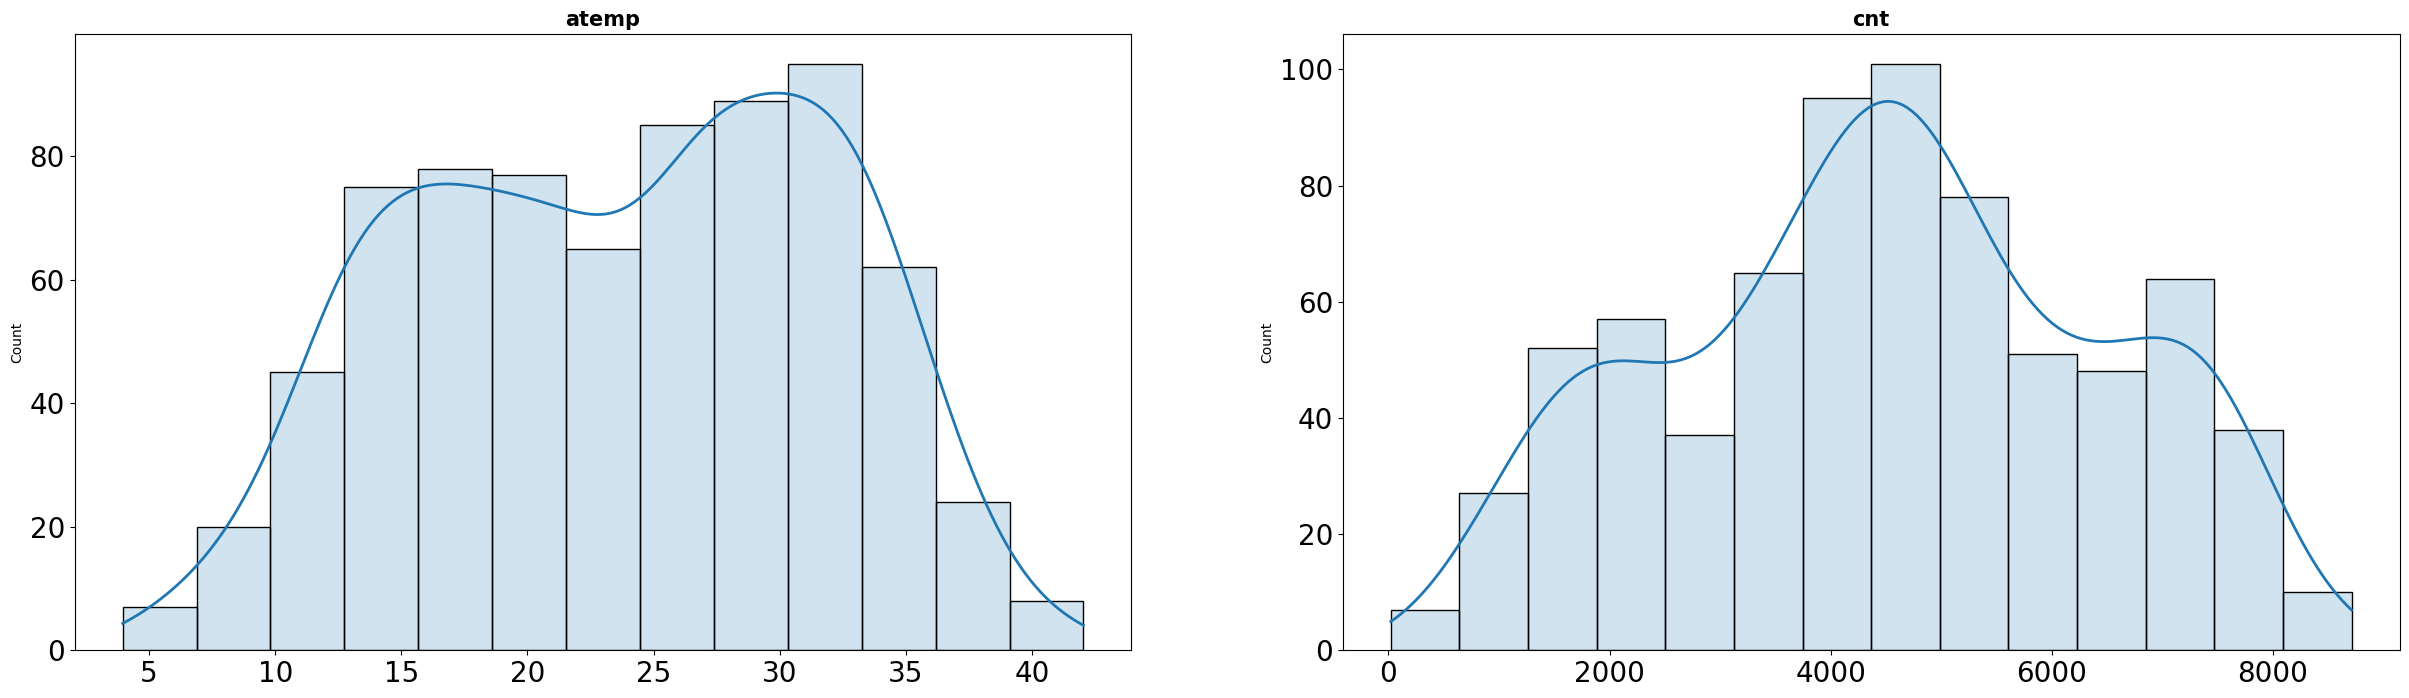

In [61]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 8))

columnas = numericas.columns
axes = axes.flat


for i, colum in enumerate(columnas): 
    sns.histplot(
        data = numericas,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


In [62]:
robust = RobustScaler()

In [63]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [64]:
x_robust= robust.transform(numericas)

In [65]:
numericas_robust= pd.DataFrame(x_robust,columns=numericas.columns)

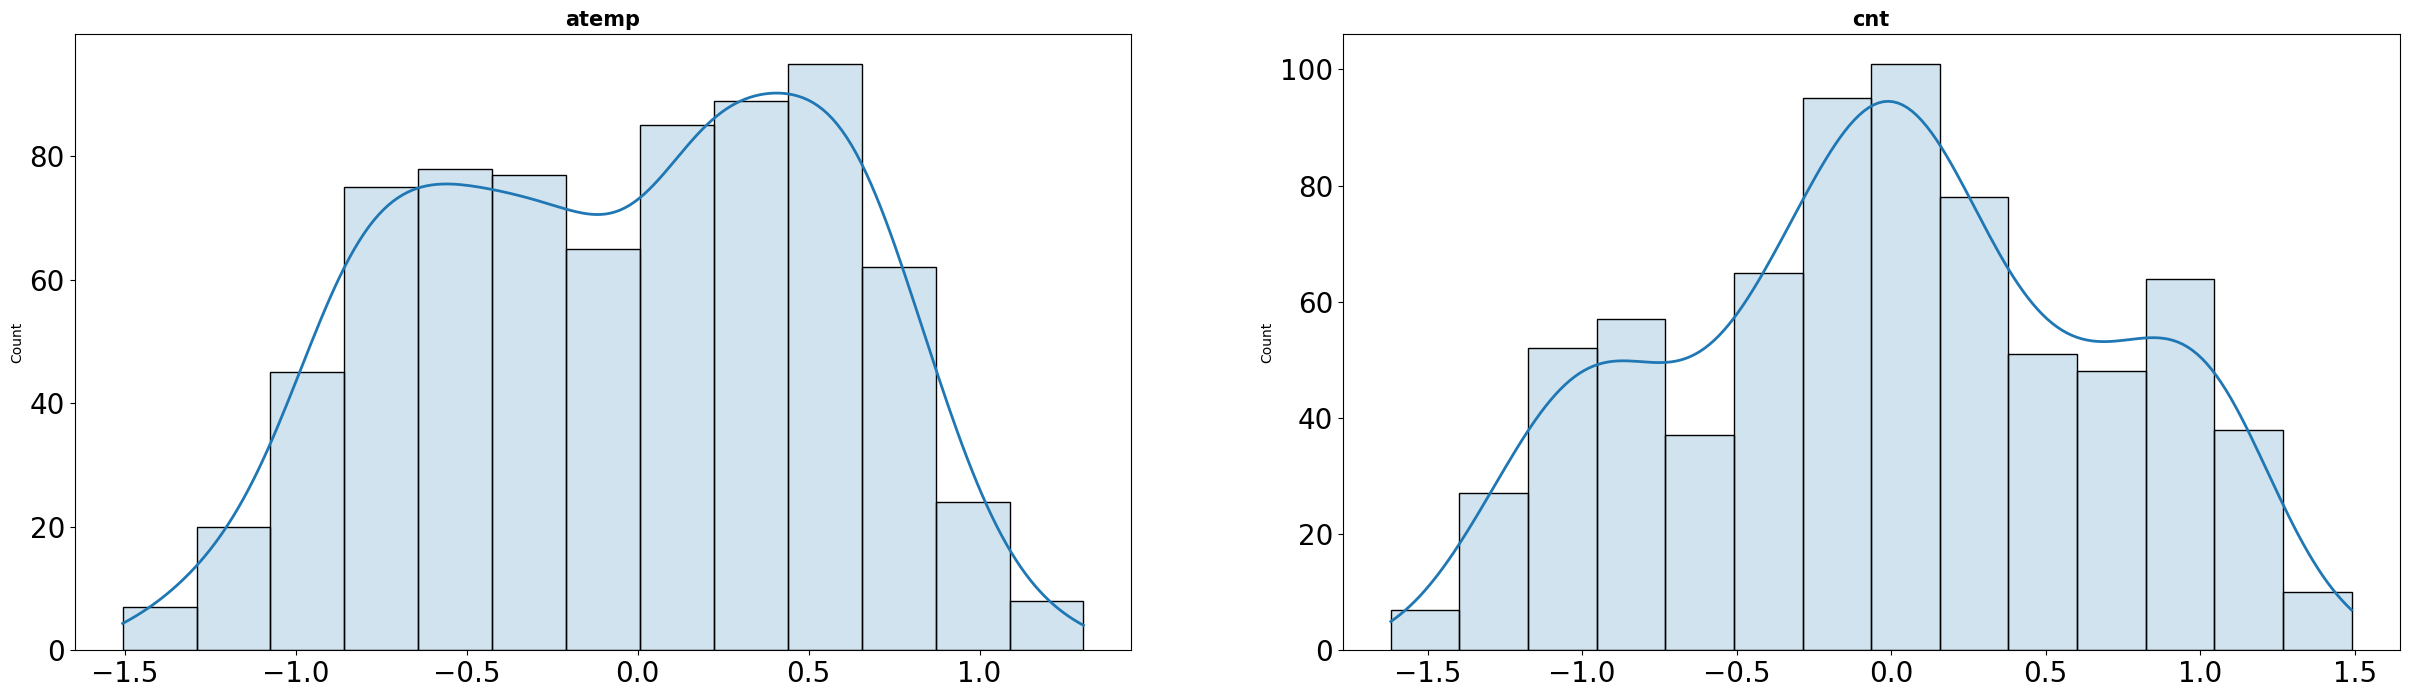

In [66]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 8))

columnas = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


In [67]:
columnas_robust=numericas_robust.columns

In [68]:
df.drop(columnas_robust, axis = 1, inplace = True)

In [69]:
df[columnas_robust] = numericas_robust[columnas_robust]

In [70]:
df.head()

,yr,mnth,dia_anual,holiday_num,weekday_num,workingday_num,weathersit,casual,seasons_autumn,seasons_spring,seasons_summer,seasons_winter,atemp,cnt
0,0,1,1,1,0,0,2,331,0.0,0.0,0.0,1.0,-0.456399,-1.274385
1,0,1,2,0,1,1,2,131,0.0,0.0,0.0,1.0,-0.492863,-1.340188
2,0,1,3,0,2,1,1,120,0.0,0.0,0.0,1.0,-1.098990,-1.144211
3,0,1,4,0,3,1,1,108,0.0,0.0,0.0,1.0,-1.015201,-1.068038
4,0,1,5,0,4,1,1,82,0.0,0.0,0.0,1.0,-0.951952,-1.054448


In [71]:
#guardamos en csv y en pkl los df con los datos de casuales:

df.to_csv('datos/5.casual_encoding_estandarizacion.csv')
df.to_pickle('datos/5.casual_encoding_estandarizacion.pkl')